# Lab 6 - Data Visualization with Seaborn

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mp

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [157]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
week6 = pd.read_csv("nfloffenseweek6.csv")
week7 = pd.read_csv("nfloffenseweek7.csv")
teams = pd.read_csv("nfl_teams.csv")
colors_logos = pd.read_csv("teams_colors_logos.csv")



In [158]:
week3_column = week3.assign(week=3)
week4_column = week4.assign(week=4)
week5_column = week5.assign(week=5)
week6_column = week6.assign(week=6)
week7_column = week7.assign(week=7)
all_weeks = [week3_column, week4_column, week5_column,week6_column,week7_column]
stacked_files = pd.concat(all_weeks)
stacked_files.rename(columns={'1st_downs':'first_downs'},inplace=True)
stacked_files.merge(teams,left_on="team", right_on="Name")
files = stacked_files.merge(colors_logos,left_on="team", right_on="team_name")
files

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,first_downs,...,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,4,Baltimore Ravens,6,158,2168,349,6.2,8,2,122,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,3,Baltimore Ravens,7,181,2422,412,5.9,9,3,139,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
156,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
157,32,Indianapolis Colts,5,69,1665,343,4.9,11,4,101,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
158,25,Indianapolis Colts,6,103,2099,417,5.0,11,4,130,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

In [159]:
files[files.team.str.contains('Indianapolis Colts')].points_scored.mean()

76.4

- the way this is set up already gets you the average for all the teams... checked every teams' weeks points then averaged week 3-7 together by hand and they match so I'm thinking this is correct

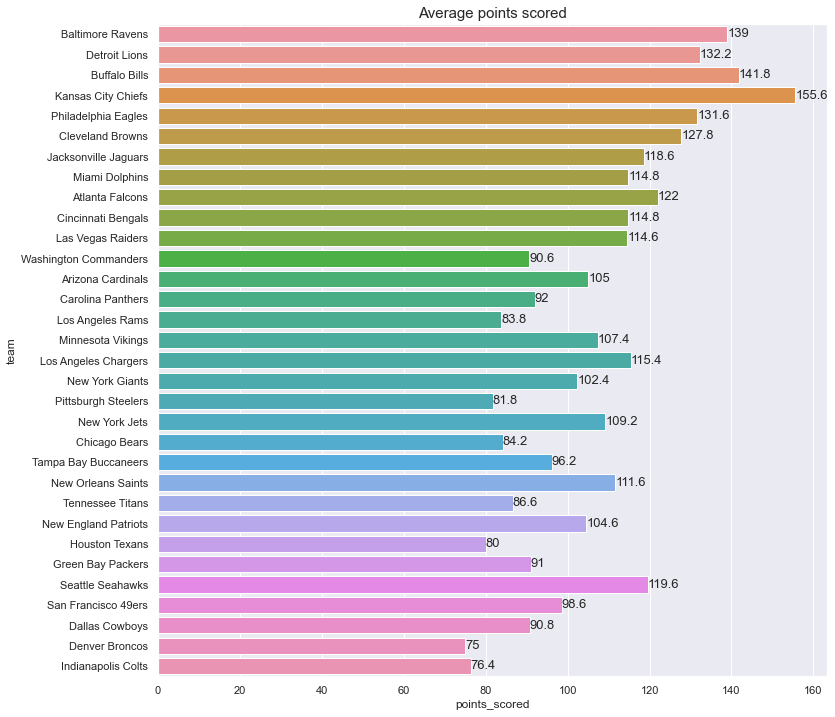

In [160]:
sns.set(rc={"figure.figsize":(12, 12)})
ax = sns.barplot(x=files.points_scored,y= files.team,
data = files,
ci=None)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Average points scored",fontsize=15);

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

- Thank you Google!!! had no idea how to do this.

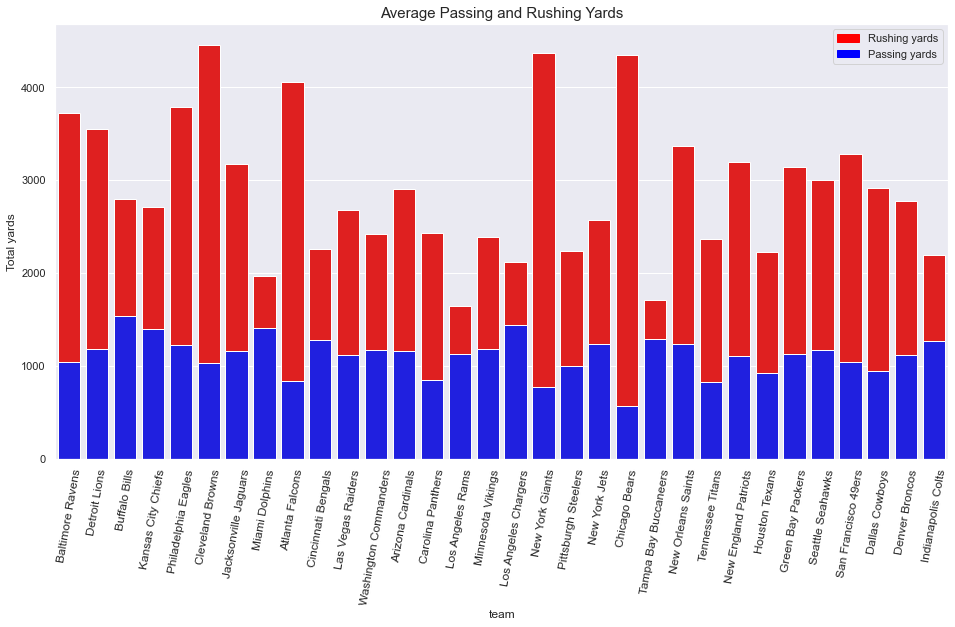

In [196]:
sns.set(rc={"figure.figsize":(16, 8)})
plt.title("Average Passing and Rushing Yards",fontsize=15);
sns.barplot(data=files, x=files.team, y= files.rushing_yards, color = 'red',estimator=np.sum, ci=None)
sns.barplot(data= files, x=files.team, y=files.passing_yards, color = 'blue', ci=None)
top = mp.Patch(color = 'red', label = 'Rushing yards')
bottom = mp.Patch(color = 'blue', label= 'Passing yards')
plt.legend(handles = [top,bottom])
plt.xticks(rotation=80, fontsize = 12)
# says passing_yards so changed it to total yards
plt.ylabel('Total yards')
plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

- not Exactly sure which one is correct so possibly leaving both. 

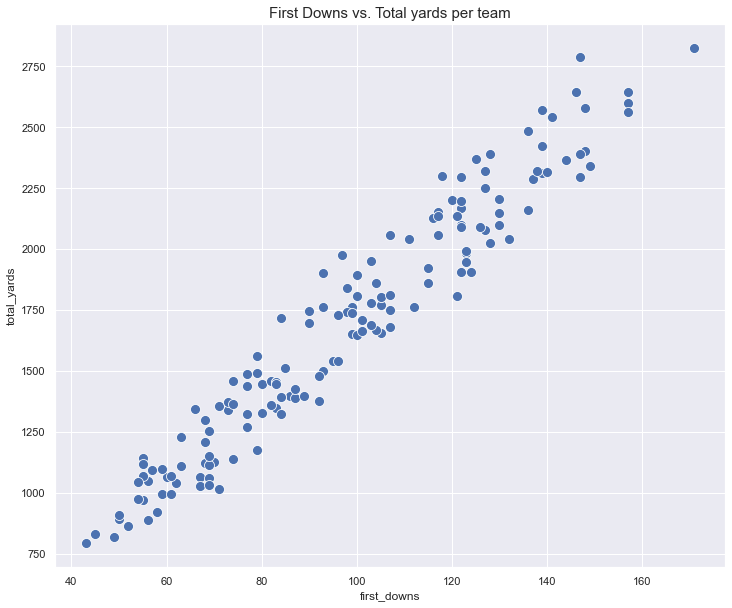

In [ ]:
plt.title("First Downs vs. Total yards per team",fontsize=15)
sns.scatterplot(x = files.first_downs ,y= files.total_yards,
s=100);

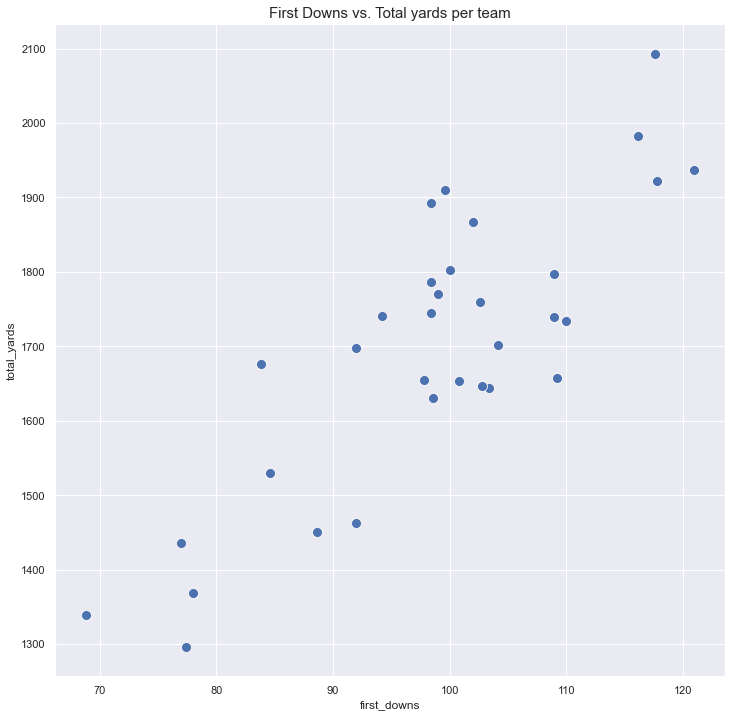

In [ ]:
plt.title("First Downs vs. Total yards per team",fontsize=15)
sns.scatterplot(x =files.groupby('team')['first_downs'].mean(),y=files.groupby('team')['total_yards'].mean(),
s=100);

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

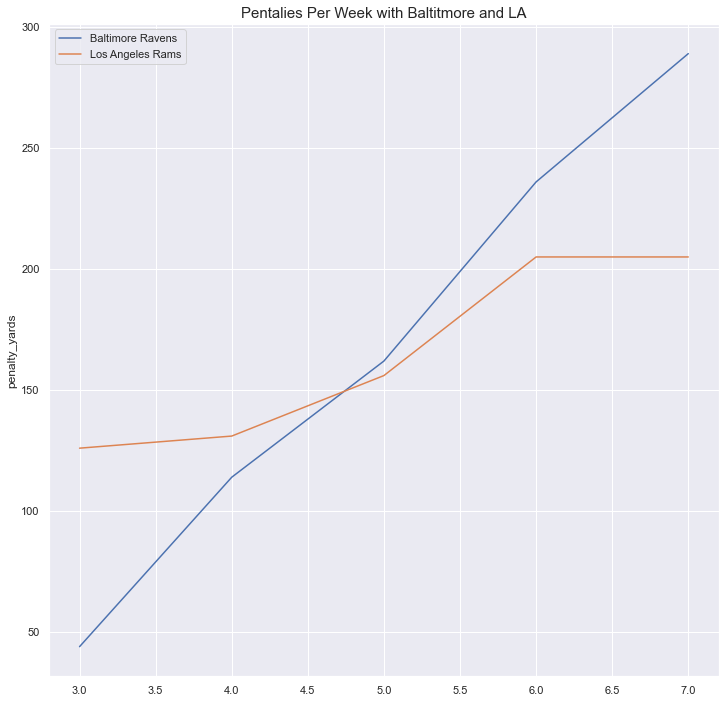

In [ ]:
plt.title("Pentalies Per Week with Baltitmore and LA",fontsize=15);
sns.lineplot(x= files.week.unique(), y=files[files.team == 'Baltimore Ravens'].penalty_yards
);
sns.lineplot(x= files.week.unique(), y=files[files.team == 'Los Angeles Rams'].penalty_yards
);
plt.legend(labels=["Baltimore Ravens","Los Angeles Rams"]);

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

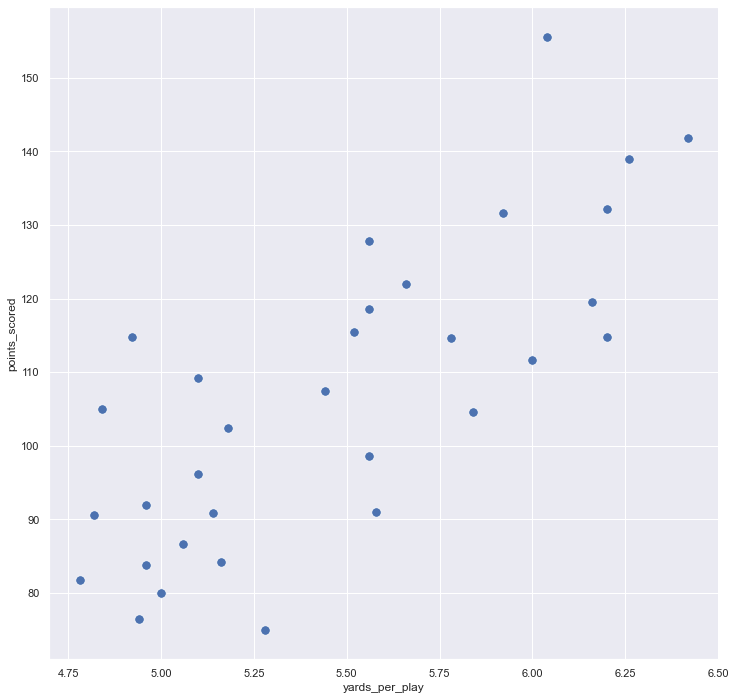

In [ ]:
play = files.groupby('team').yards_per_play.mean()
scored = files.groupby('team').points_scored.mean()
sns.scatterplot(x= play, y= scored,
s=90
);


7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

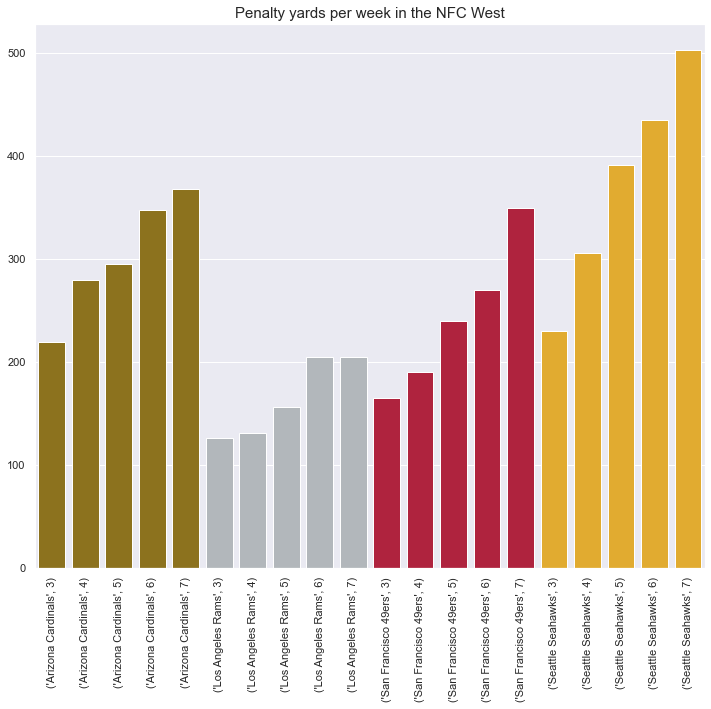

In [ ]:
sns.set(rc={"figure.figsize":(12, 10)})
penalties_nfc_west = files[files.team_division.str.contains("NFC West")].groupby(['team', 'week']).penalty_yards.mean()
team_names = [str(names) for names in penalties_nfc_west.keys().values]
chart = sns.barplot( x=team_names, y=penalties_nfc_west.values, palette= files.team_color2)
plt.title("Penalty yards per week in the NFC West",fontsize=15);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

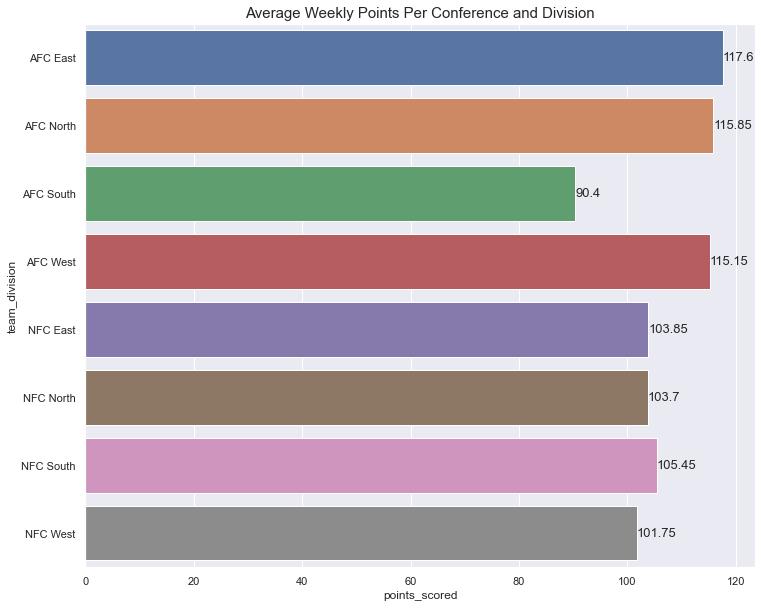

In [ ]:
Group = files.groupby('team_division').points_scored.mean()
ax =sns.barplot(x=Group, y=Group.index,
data = files,
ci=None)
ax.bar_label(ax.containers[0],fontsize=13)
plt.title("Average Weekly Points Per Conference and Division",fontsize=15);